In [2]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

%matplotlib ipympl

<img src="Figurer/NTNU_Logo.png" align="left" style="width: 30%">
<br clear="all" />
<br><br>

#  Impulsrespons og konvolusjon
* **Emne AIS2201 - Signalbehandling**
* **Uke 10, 2022**
<br>

# Video 1 - Impulsrespons

In [11]:
%%html
<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=4cbcfc7d-44c8-4036-8db4-ae4e00c13a5a&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

# Nøkkelpunkt fra video

## Repetisjon deltapuls



<img src="Figurer/10_Digitale Filtre Intro/Fig1_dn.png" style="width: 40%; margin-left: 10%; margin-right :10%" align="right"/>


<br>

* **Definisjon:**
$$
\delta[n] = 
\begin{cases}
1, \ \ n=0\\
0, \ \ n\neq 0
\end{cases}
$$


## Impulsrespons

* Premiss for LTI-system:
    * *Dersom systemets reaksjon til en deltapuls $\delta[n]$ er kjent, er det mulig å predikere hvordan systemet vil reagere på alle mulige inngangssignal.*
* Utgangssignalet til et LTI-system gitt en impuls $\delta[n]$ som inngangssignal kalles impulsresponsen $h[n]$ til systemet.

<br>
<br>
<img src="Figurer/10_Digitale Filtre Intro/Fig10_hn.png" style="width: 60%; margin-left: 200px%" />

## For FIR-Filtre


* Impulsresponsen til et filter finner vi ved å sette inngangssignalet $x[n] = \delta[n]$
\begin{align}
y[n] &= \sum_{k=0}^{M} b_k \cdot x[n-k]\\
h[n] &= y[n]\big|_{x[n] = \delta[n]}\\
h[n] &= \sum_{k=0}^{M} b_k \cdot \delta[n-k]\\
&= b_0 \cdot \delta[n] + b_1\cdot \delta[n-1] + \ldots + b_M\cdot \delta[n-M]\\ \\
&= 
\begin{cases}
b_{k=n}, \ \ 0\leq n \leq M \\
0, \ \ \ \ \ \ \ \text{ellers}
\end{cases}
\end{align}


* Impulsresponen har en endelig lengde $M+1$, der alle sampler før $n=0$ og etter $n=M$ har verdien $0$. 
    * Derav navnet **FIR** - **F**inite **I**mpulse **R**esponse
    * Impulsresponsen til et FIR filter er et signal som gjengir filterkoeffisientene $b_k$
<img src="Figurer/10_Digitale Filtre Intro/Fig11_FIR.png" style="width: 80%; margin-left: 100px%" />

## Eksempel på FIR filter: *Middelverdifilter*

* Et $L$-punkts middelverdifilter rgner ut gjennomsnittsverdien av de $L$ foregående samplene til signalet $x[n]$.
* Fungerer som et lavpassfilter ved å glatte ut momentane endringer i signalet.
* Filterkoeffisienter:
$$b_k = \left[\frac{1}{L}, \frac{1}{L}, \ldots, \frac{1}{L}\right]$$

* Lite komplisert og mye brukt.

## Video: *impulsrespons regneeksempel*

* Finn et uttrykk for impulsresponsen $h[n]$ til et 8-punkts middelverdifilter.

In [12]:
%%html
<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=edebdc51-e957-4d5f-8502-ae5000e2f091&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

## Kontrollspørsmål:

1. Finn et uttrykk for impulsresponen til filteret med filterkoeffisienter gitt i tabellen under:

| $k$ | $0$ | $1$ | $2$ | $3$ | $4$ | 
|---|---|---|---|---|---|
|$b_k$| $\frac{1}{4}$ | $0$ | $- \frac{1}{2}$ | $0$ | $\frac{1}{4}$ | 

**Svar:**<br>
Differanseligningen blir:
$$
\begin{align}
y[n] &= b_0 \cdot x[n] + b_1 \cdot x[n-1] + b_2 \cdot x[n-2] + \ldots \\
&= \frac{1}{4} \cdot x[n] + 0 \cdot x[n-1] - \frac{1}{2}\cdot x[n-2] + 0 \cdot x[n-3] + \frac{1}{4}\cdot x[n-4]\\
&= \frac{1}{4} \cdot x[n] - \frac{1}{2}\cdot x[n-2] + \frac{1}{4}\cdot x[n-4]\\
\end{align}
$$


Dermed finner vi impulsresponsen med substitusjonen $x[n] = \delta[n]$:


$$
\begin{align}
h[n] &= y[n]\big|_{x[n] = \delta[n]}\\
&= \frac{1}{4} \cdot \delta[n] - \frac{1}{2}\cdot \delta[n-2] + \frac{1}{4}\cdot \delta[n-4]\\
\end{align}
$$

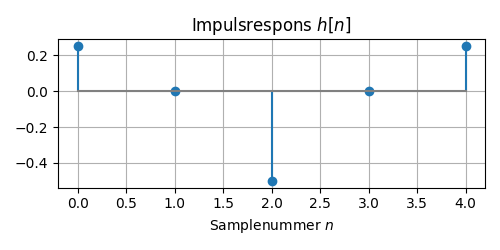

In [4]:
# Pythonkode for å lage plot av impulsresponsen
n = np.arange(5)
hn = np.array([1/4, 0, -1/2, 0, 1/4])
plt.close(1); plt.figure(1, figsize=(5,2.5))
plt.stem(n, hn, basefmt="grey")
plt.grid(True)
plt.title(r"Impulsrespons $h[n]$")
plt.xlabel(r"Samplenummer $n$")
plt.tight_layout()

# Video 2 - Konvolusjon

In [13]:
%%html
<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=1cc8cc9d-2437-4a7f-b387-ae5000eac177&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

# Nøkkelpunkt fra video

## Utregning av utgangssignal

* Impulsrespons:
$$h[n] = F(\delta[n])$$

* Etthvert signal kan beskrives som en *lineær kombinasjon* av deltapulser:
\begin{align}
x[n] &=\ldots + x[-1] \cdot \delta[n+1] + x[0]\cdot \delta[n] + x[1] \cdot \delta[n-1] + \ldots \\
&= \sum_{k=0}^{\infty} x[k]\cdot \delta[n-k]
\end{align}

* Utregning av arbitrært utgangssignal $y[n]$ vil derfor kunne beskrives som en *lineær kombinasjon* av impulsresponser:
\begin{align}
y[n] &= F(x[n])\\
     &= F\left(\sum_{k=0}^{\infty} x[k]\cdot \delta[n-k]\right)\\
     &= \sum_{k=0}^{\infty} x[k]\cdot F(\delta[n-k])\\
     &= \sum_{k=0}^{\infty} x[k]\cdot h[n-k]
\end{align}


## Konvolusjon

* Utgangssignalet til et LTI-system utregnes ved å utføre ***konvolusjon*** av inngangssignalet $x[n]$ og impulsresponsen $h[n]$.
    * Konvolusjon har en egen matematisk operator: $*$.

\begin{align}
y[n] &= \sum_{k=-\infty}^{\infty} x[k]\cdot h[n-k]\\
&= x[n]*h[n]
\end{align}

## Konvolusjon med python

* Vi bruker `numpy`-funksjonen `convolve()`.

In [6]:
xn = np.array([1, 2, -2, -1])
hn = np.array([1/3, 1/3, 1/3])
yn = np.convolve(xn, hn)
print(yn)

[ 0.33333333  1.          0.33333333 -0.33333333 -1.         -0.33333333]


## Demo: Filtrering av signal med konvolusjon

Output()

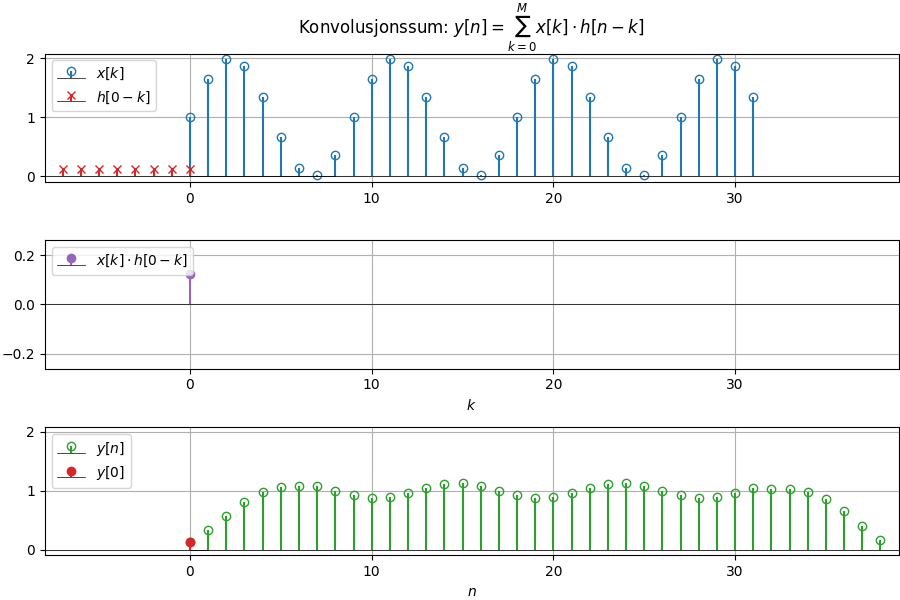

In [3]:
from Kildekode._10_Konvolusjon import convolutionDemo
n = np.arange(32)
xn = sin(2*pi/9*n)+1# Sinussekvens
hn = np.ones(8)/8 # 5-punkts middelverdifilter
convolutionDemo(xn, hn, fig_num=2,figsize=(9,6)); #

* Stegvis beskrivelse av konvolusjon visuelt:
    1. Tidsreverser (flip) impulsresponsen $h[k]$ rund $k=0$
    2. Forskyv den filppede impulsresponsen $h[-k]$ langs tidsaksen $n$ antall sampler.
    3. Utfør punktvis multiplikasjon mellom flippet og forskjøvet impulsrespons med inngangssignalet.
    4. Summen av resultatet fra punkt 3 gir utgangsverien $y[n]$.
* Anbefaler å prøve seg frem med ulike typer signal og impulsrespons. 

## Observasjoner.

* Lengde utgangssignal tilsvarer summen av lengden til inngangssignalet og impulsresponsen minus 1.
$$L_y = L_x + L_h -1$$


* Digitale filtre har en "responstid", og det filtrerte signalet vil ofte "henge etter" inngangssignalet.

## Konvolusjon egenskaper

1. Kommutativ 
\begin{align}
x[n]*h[n] &= h[n]*x[n] \\
\sum_{k=0}^{\infty} x[k]\cdot h[n-k] &= \sum_{k=0}^{\infty} h[k]\cdot x[n-k]
\end{align}


2. Assossiativ
$$(x[n]*y[n])*v[n] = x[n]*(y[n]*v[n])$$


3. Distributiv *(linearitet)*
$$(x[n] + y[n])*v[n] = x[n]*v[n] + y[n]*v[n]$$


4. Konvolusjon og fouriertransformasjon
$$ x[n]*y[n] \leftrightarrow X\left(\hat{\omega} \right)\cdot Y\left(\hat{\omega} \right)$$

## Manuell utregning av konvolusjon
*(Ofte enklere å snu om på uttrykket slik at vi summerer sammen ulikt forskjøvne og vektede kopier av inngangssignalet $x[n]$)*

\begin{align}
y[n] &= \sum_{k=0}^{\infty} x[k]\cdot h[n-k] \\
     &= \sum_{k=0}^{\infty} h[k]\cdot x[n-k]\\
     &= h[0]\cdot x[n]+h[1]\cdot x[n-1] + h[2]\cdot x[n-2]\ldots 
\end{align}

1. Sett opp de ulikt forkjøvne singalrekkene $x[n-k]$ 
2. Multipliser med hver av samplene til impulsresponen $h[k]$
3. Legg sammen alle de ulikt vektede signalene.

## Video:  *stegrespons regneeksempel*
* Bruk konvolusjon til å finne stegresponsen $s[n]$ til et system der impulsresponsen er 
$$h[n] = \delta[n]-\delta[n-1]+2\delta[n-2]-\delta[n-3]+\delta[n-4]$$

In [14]:
%%html
<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=c991b421-962e-4584-b434-ae5000f649ef&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

## Kontrollspørsmål
1. Et digitalt filter har impulsresponsen $h[n] = (u[n] - u[n-4])\cdot \frac{1}{4}$. Hva blir filterets stegrespons $s[n]$?

**Svar:**
Vi bruker tabellutregning:

| $n$ | $-1$ | $0$ | $1$ | $2$ | $3$ | $4$ | $5$ | $6$ | $\ldots$ |
|---|---|---|---|---|---|---|---|---|---|
| $h[n]$ | $0$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $0$ | $0$ | $0$ | $0$ |
| $x[n]=u[n]$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
|  |  |  |  |  |  |  |  |  |  |
| $h[0]\cdot u[n-0]$ | $0$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$|
| $h[1]\cdot u[n-1]$ | $0$ | $0$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$|
| $h[2]\cdot u[n-2]$ | $0$ | $0$ | $0$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$|
| $h[3]\cdot u[n-3]$ | $0$ | $0$ | $0$ | $0$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$ | $\frac{1}{4}$|
| $h[4]\cdot u[n-4]$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$|
|  |  |  |  |  |  |  |  |  |  |
|$s[n]$ | $0$ | $\frac{1}{4}$ | $\frac{2}{4}$ | $\frac{3}{4}$ | $1$ | $1$ | $1$ | $1$ | $1$|

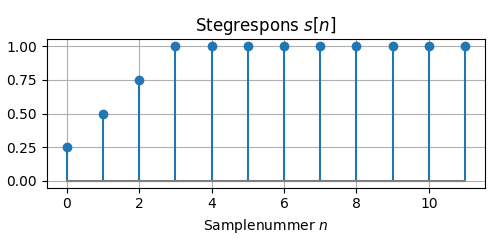

In [9]:
N = 12
n = np.arange(N)
un = np.ones(N)
hn = np.array([1/4, 1/4, 1/4, 1/4])
sn = np.convolve(un, hn)

plt.close(3); plt.figure(3, figsize=(5,2.5))
plt.stem(n, sn[0:N], basefmt="grey")
plt.grid(True)
plt.title(r"Stegrespons $s[n]$")
plt.xlabel(r"Samplenummer $n$")
plt.tight_layout()

# Video 3 - Sammensatte System

In [15]:
%%html
<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=2879357e-9bc9-47c7-8cd8-ae5000fef813&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

# Nøkkelpunkt fra video

<img src="Figurer/10_Digitale Filtre Intro/Fig12_LTI_par.png" style="width: 60%; margin-right: 40%" />

<img src="Figurer/10_Digitale Filtre Intro/Fig12_LTI_cas.png" style="width: 60%; margin-right: 40%" />

# Oppsummering impulsrespons og konvolusjon

* Digitale filtre tar i bruk en lineær kombinasjon av tilgjengelige signalsampler for å regne ut en utgangsverdi $y[n]$ for hver sample.
* *Lineære*, og *Tidsinvariante* (LTI) system tillater mye fleksibilitet med tanke på rekkefølge av operasjoner, og kan beskrives med sin *impulsrespons* $h[n]$.
* Utgangssignalet $y[n]$ til et LTI-system utregnes ved *konvolusjon* ($y[n] = x[n]*h[n]$).
* *Kausale* system baserer seg kun på foregående signalsampler som allerede har "vert gjennom" systemet ved utregning av utgangsverdi $y[n]$. 
* *Filterordenen* for et digitalt filter forteller hvor langt bak i tid systemet må huske tidligere sampler.
* FIR filter er en undergruppe av LTI-system hvor kun impulsresponsen $h[n]$ korresponderer med filterkoeffisentene.
    * Kun definert med filterkoeffisenter $b_k$